In [ ]:
!pip install tensorflow openpyxl

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold, train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
drive.mount('/content/drive')
file_path = 'change to your xlsx file path'

Mounted at /content/drive


# 6個月調參版本

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_train, y_train = X[~april_mask], y[~april_mask]
creator_train = creator_list[~april_mask]
month_train = month_targets[~april_mask]


In [ ]:
# === 步驟 6：自動調參（不使用交叉驗證）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}
best_model = None
best_r2 = -np.inf
best_params = None

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            model = Sequential([
                LSTM(lstm_units, input_shape=(2, 2)),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

            y_pred_train = model.predict(X_train).flatten()
            r2 = r2_score(y_train, y_pred_train)

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
# === 步驟 7：使用最佳參數重新訓練模型 ===
print(f"使用最佳參數訓練: {best_params}")
final_model = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
final_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 64, 'lr': 0.005, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_train_pred = final_model.predict(X_train).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([yt]), f"{m}_views")[0]
    for yt, m in zip(y_train, month_train)
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([yp]), f"{m}_views")[0]
    for yp, m in zip(y_train_pred, month_train)
])
y_april_pred = final_model.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

Test RMSE: 515198.57
Test R² Score: 0.92
April RMSE: 2579080.70
April R²: -0.04


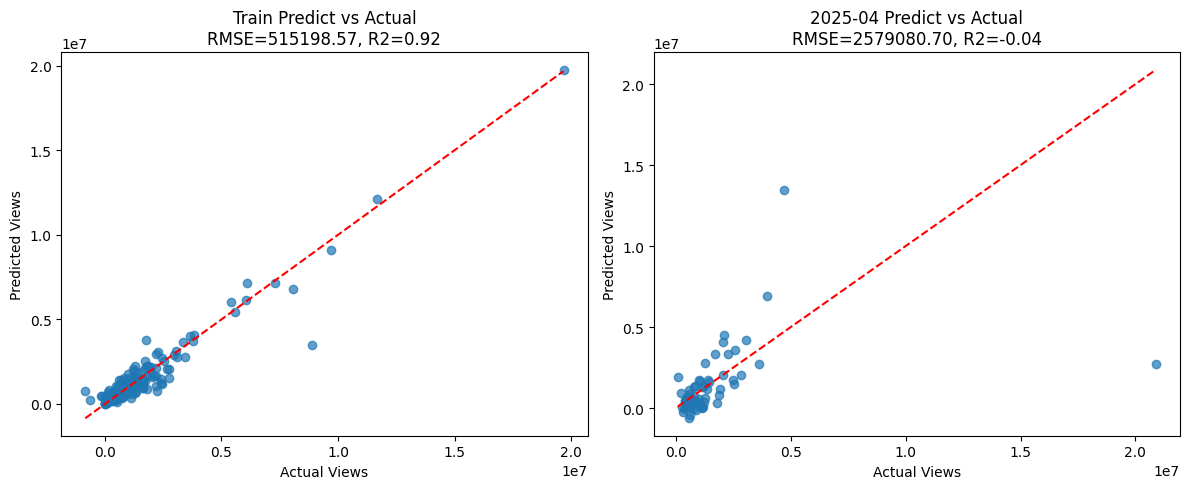

In [ ]:
# === 步驟 9：評估與繪圖 ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train Predict vs Actual\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Predict vs Actual\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.tight_layout()
plt.show()

In [ ]:
# 額外步驟：命中率與 NDCG
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0
# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.500
標準化折扣累積增益 (NDCG) 前 10%: 0.958


In [ ]:
# 誤差最大前 10 名創作者
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"8,883,244","3,479,670","5,403,574"
84,daddy.iam.9999,"1,744,684","3,757,742","2,013,058"
16,allieallie,"-846,616","748,247","1,594,863"
131,taiwango2020,"2,223,952","789,907","1,434,045"
172,蔡淘貴,"2,445,138","1,155,323","1,289,815"
239,terry-films,"8,049,501","6,779,180","1,270,321"
161,gloryandy,"2,734,187","1,514,117","1,220,070"
223,allieallie,"2,419,241","1,210,538","1,208,703"
92,gloryandy,"2,177,296","1,063,927","1,113,369"
102,ktstory,"6,101,383","7,163,530","1,062,147"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"20,899,148","2,725,032","18,174,116"
32,terry-films,"4,719,511","13,451,784","8,732,273"
33,ktstory,"3,951,123","6,942,556","2,991,433"
25,smilevlogtaiwan,"2,092,497","4,532,784","2,440,287"
16,allieallie,"2,075,405","4,066,794","1,991,389"
62,taiwango2020,"82,693","1,937,634","1,854,941"
12,realchina,"1,710,938","3,345,358","1,634,420"
14,54free,"1,276,339","2,771,326","1,494,987"
18,zuola,"1,781,912","291,240","1,490,672"
5,itravelgo,"555,538","-629,022","1,184,560"


# 9個月調參版本

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_train, y_train = X[~april_mask], y[~april_mask]
creator_train = creator_list[~april_mask]
month_train = month_targets[~april_mask]


In [ ]:
# === 步驟 6：自動調參（不使用交叉驗證）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}
best_model = None
best_r2 = -np.inf
best_params = None

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            model = Sequential([
                LSTM(lstm_units, input_shape=(2, 2)),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

            y_pred_train = model.predict(X_train).flatten()
            r2 = r2_score(y_train, y_pred_train)

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# === 步驟 7：使用最佳參數重新訓練模型 ===
print(f"使用最佳參數訓練: {best_params}")
final_model = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
final_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.005, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_train_pred = final_model.predict(X_train).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([yt]), f"{m}_views")[0]
    for yt, m in zip(y_train, month_train)
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([yp]), f"{m}_views")[0]
    for yp, m in zip(y_train_pred, month_train)
])
y_april_pred = final_model.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

Test RMSE: 626928.18
Test R² Score: 0.88
April RMSE: 1764434.40
April R²: 0.51


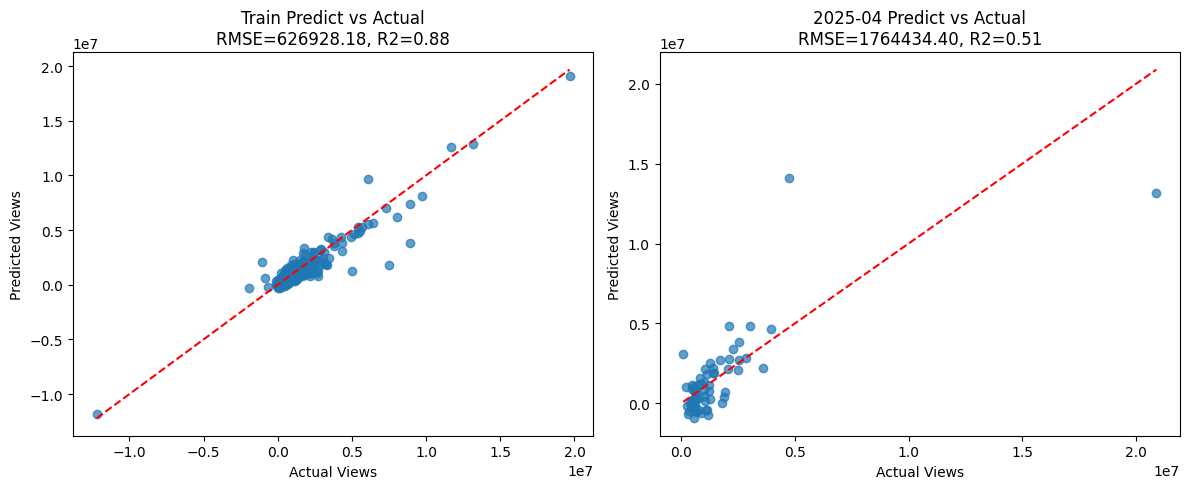

In [ ]:
# === 步驟 9：評估與繪圖 ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train Predict vs Actual\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Predict vs Actual\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.tight_layout()
plt.show()

In [ ]:
# 額外步驟：命中率與 NDCG
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0
# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.667
標準化折扣累積增益 (NDCG) 前 10%: 0.983


In [ ]:
# 誤差最大前 10 名創作者
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
94,smilevlogtaiwan,"7,492,922","1,820,162","5,672,760"
238,rondoyoyo,"8,883,244","3,780,850","5,102,394"
75,deliciousthirsty,"5,030,917","1,285,727","3,745,190"
309,ktstory,"6,101,383","9,630,215","3,528,832"
84,daddy.iam.9999,"-1,063,079","2,031,265","3,094,344"
368,gloryandy,"2,734,187","813,583","1,920,604"
446,terry-films,"8,049,501","6,167,259","1,882,242"
144,deliciousthirsty,"-1,937,202","-331,151","1,606,051"
291,daddy.iam.9999,"1,744,684","3,330,575","1,585,891"
102,ktstory,"8,915,789","7,347,700","1,568,089"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
32,terry-films,"4,719,511","14,121,424","9,401,913"
31,rondoyoyo,"20,899,148","13,172,569","7,726,579"
62,taiwango2020,"82,693","3,093,284","3,010,591"
25,smilevlogtaiwan,"2,092,497","4,837,021","2,744,524"
43,chairman1227,"1,179,918","-756,773","1,936,691"
18,zuola,"1,781,912","-10,757","1,792,669"
22,sonarddg,"3,040,742","4,825,300","1,784,558"
21,jing,"1,147,605","-456,318","1,603,923"
17,阿杰趴趴go,"1,092,165","-445,197","1,537,362"
13,wallace0935,"1,884,079","361,899","1,522,180"


# 12個月調參版本

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,3000,1265214,2000,1231154,4000,1447236,2000,991758,2000,894392,...,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,700,328885,1100,502659,1400,649359,1200,633065,1700,503433,...,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,0,609998,2000,619214,1000,644864,1000,737051,1000,580588,...,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,678782,1000,516446,1000,597046,1000,418324,1000,360793,...,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,1676109,2000,887819,2000,1179563,1000,1109007,1000,865679,...,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2600,-83502,3100,438050,3300,616071,2000,382466,3000,692321,...,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,900,466128,1100,450602,800,332796,500,246380,900,253562,...,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,974311,0,495264,0,336247,0,721623,0,785773,...,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,0.157156,0.044886,-0.206289,-0.045368,0.241254,0.040374,-0.186145,-0.011904,-0.149731,-0.123931,...,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.474412,-0.613628,-0.466983,-0.404736,-0.349774,-0.332434,-0.380862,-0.109438,-0.184032,-0.178069,...,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.666629,-0.415923,-0.206289,-0.347239,-0.440702,-0.334534,-0.429541,-0.081162,-0.264068,-0.167385,...,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.392034,-0.367548,-0.495949,-0.397935,-0.440702,-0.356877,-0.429541,-0.167829,-0.264068,-0.197820,...,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.117439,0.333865,-0.206289,-0.214736,-0.213383,-0.084696,-0.429541,0.019978,-0.264068,-0.127907,...,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,0.047318,-0.903657,0.112338,-0.436608,0.082131,-0.347988,-0.186145,-0.177579,-0.035395,-0.151913,...,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.419493,-0.517106,-0.466983,-0.430416,-0.486165,-0.480348,-0.551239,-0.214583,-0.275501,-0.212669,...,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.666629,-0.159704,-0.785609,-0.408384,-0.668020,-0.478735,-0.672937,-0.085358,-0.378404,-0.138972,...,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_train, y_train = X[~april_mask], y[~april_mask]
creator_train = creator_list[~april_mask]
month_train = month_targets[~april_mask]


In [ ]:
# === 步驟 6：自動調參（不使用交叉驗證）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}
best_model = None
best_r2 = -np.inf
best_params = None

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            model = Sequential([
                LSTM(lstm_units, input_shape=(2, 2)),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

            y_pred_train = model.predict(X_train).flatten()
            r2 = r2_score(y_train, y_pred_train)

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
# === 步驟 7：使用最佳參數重新訓練模型 ===
print(f"使用最佳參數訓練: {best_params}")
final_model = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
final_model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 64, 'lr': 0.005, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_train_pred = final_model.predict(X_train).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([yt]), f"{m}_views")[0]
    for yt, m in zip(y_train, month_train)
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([yp]), f"{m}_views")[0]
    for yp, m in zip(y_train_pred, month_train)
])
y_april_pred = final_model.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

Test RMSE: 1174256.67
Test R² Score: 0.85
April RMSE: 2897658.22
April R²: -0.31


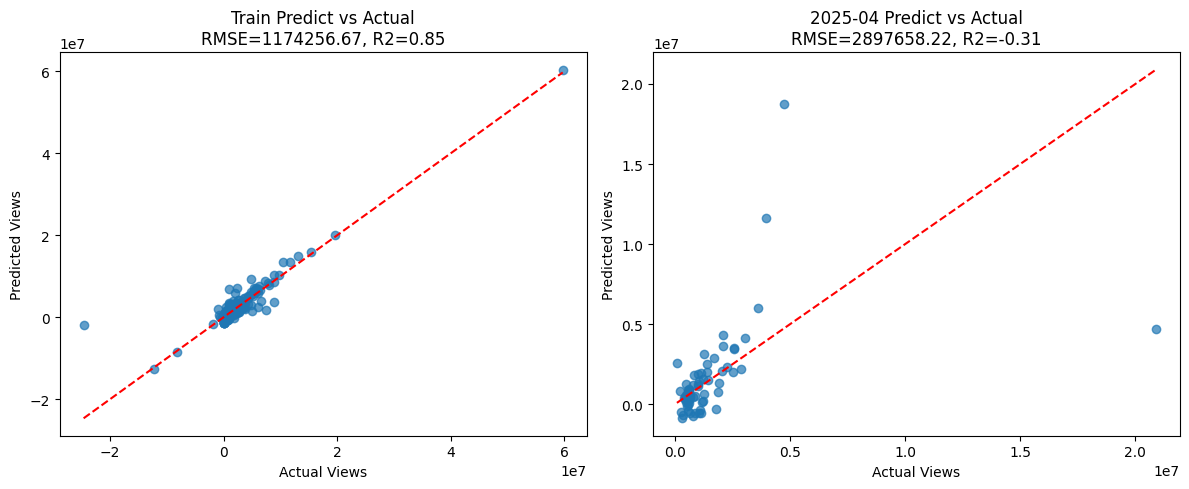

In [ ]:
# === 步驟 9：評估與繪圖 ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train Predict vs Actual\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Predict vs Actual\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.tight_layout()
plt.show()

In [ ]:
# 額外步驟：命中率與 NDCG
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0
# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.833
標準化折扣累積增益 (NDCG) 前 10%: 0.980


In [ ]:
# 誤差最大前 10 名創作者
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
96,magic_studio_,"-24,636,792","-1,924,578","22,712,214"
163,smilevlogtaiwan,"966,663","6,803,511","5,836,848"
301,smilevlogtaiwan,"7,492,922","1,749,571","5,743,351"
445,rondoyoyo,"8,883,244","3,628,579","5,254,665"
161,gloryandy,"2,306,515","7,072,755","4,766,240"
92,gloryandy,"4,895,130","9,243,359","4,348,229"
148,supertaste,"2,057,576","5,888,925","3,831,349"
169,rondoyoyo,"6,109,431","2,458,435","3,650,996"
282,deliciousthirsty,"5,030,917","1,414,980","3,615,937"
100,rondoyoyo,"10,395,765","13,536,584","3,140,819"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"20,899,148","4,723,139","16,176,009"
32,terry-films,"4,719,511","18,762,979","14,043,468"
33,ktstory,"3,951,123","11,650,495","7,699,372"
62,taiwango2020,"82,693","2,558,214","2,475,521"
34,蔡淘貴,"3,601,813","5,977,755","2,375,942"
25,smilevlogtaiwan,"2,092,497","4,343,529","2,251,032"
18,zuola,"1,781,912","-323,223","2,105,135"
14,54free,"1,276,339","3,104,709","1,828,370"
21,jing,"1,147,605","-522,175","1,669,780"
42,hard2men1213,"1,026,729","-576,577","1,603,306"


# 6個月交叉驗證版本+調參

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_all = X[~april_mask]
y_all = y[~april_mask]
creator_all = creator_list[~april_mask]

In [ ]:
# === 步驟 6：自動調參（Grid Search + KFold）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}

best_model = None
best_r2 = -np.inf
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            fold_r2_scores = []
            for train_idx, val_idx in kf.split(X_all):
                X_train, X_val = X_all[train_idx], X_all[val_idx]
                y_train, y_val = y_all[train_idx], y_all[val_idx]

                model = Sequential([
                    LSTM(lstm_units, input_shape=(2, 2)),
                    Dense(1)
                ])
                model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
                model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

                y_val_pred = model.predict(X_val).flatten()
                r2 = r2_score(y_val, y_val_pred)
                fold_r2_scores.append(r2)

            avg_r2 = np.mean(fold_r2_scores)
            print(f"✅ LSTM={lstm_units}, LR={lr}, Batch={batch_size} → 平均 R2: {avg_r2:.4f}")

            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
✅ LSTM=32, LR=0.001, Batch=16 → 平均 R2: 0.6389


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
✅ LSTM=32, LR=0.001, Batch=32 → 平均 R2: 0.6478


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
✅ LSTM=32, LR=0.005, Batch=16 → 平均 R2: 0.4601


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
✅ LSTM=32, LR=0.005, Batch=32 → 平均 R2: 0.4722


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
✅ LSTM=64, LR=0.001, Batch=16 → 平均 R2: 0.5905


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
✅ LSTM=64, LR=0.001, Batch=32 → 平均 R2: 0.6266


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
✅ LSTM=64, LR=0.005, Batch=16 → 平均 R2: 0.3001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
✅ LSTM=64, LR=0.005, Batch=32 → 平均 R2: 0.3042


In [ ]:
# === 步驟 7：用最佳參數重新訓練模型並保留驗證資料 ===
print(f"使用最佳參數訓練: {best_params}")
model_final = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
model_final.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
model_final.fit(X_all, y_all, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.001, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_april_pred = model_final.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [ ]:
#  計算整體訓練資料上的預測表現
y_train_pred = model_final.predict(X_all).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_views")[0]
    for y_, month in zip(y_all, month_targets[~april_mask])
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_views")[0]
    for y_, month in zip(y_train_pred, month_targets[~april_mask])
])

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
#  四月預測表現
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test RMSE: 949836.39
Test R² Score: 0.73
April RMSE: 1594392.82
April R²: 0.60


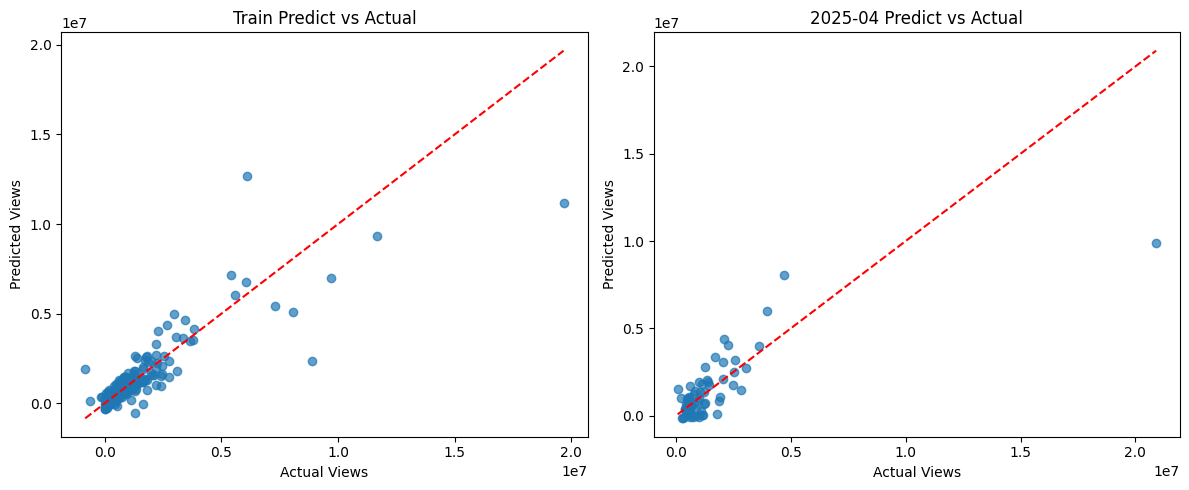

In [ ]:
# === 步驟 9：評估與繪圖 ==
# 畫圖
plt.figure(figsize=(12, 5))

# 左圖：訓練資料預測表現
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title("Train Predict vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

# 右圖：四月預測表現
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title("2025-04 Predict vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.tight_layout()
plt.show()

In [ ]:
# === 額外步驟：計算命中率與 NDCG ===
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

# 取前 10% 人選
top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

# 計算 Hit Rate（命中幾個同樣的創作者）
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# DCG 計算函數
def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    # 使用 log1p 做平滑，避免數值爆炸
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))

    return np.sum(gains / discounts)

# 計算 DCG 與 NDCG
dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.667
標準化折扣累積增益 (NDCG) 前 10%: 0.995


In [ ]:
# === 額外步驟：誤差最大前 10 名創作者 ===

# 訓練集誤差（全體資料）
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_all,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))



訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
100,rondoyoyo,"19,673,918","11,161,586","8,512,332"
102,ktstory,"6,101,383","12,704,693","6,603,310"
31,rondoyoyo,"8,883,244","2,376,228","6,507,016"
239,terry-films,"8,049,501","5,090,457","2,959,044"
16,allieallie,"-846,616","1,887,973","2,734,589"
33,ktstory,"9,702,717","6,988,344","2,714,373"
169,rondoyoyo,"11,678,081","9,343,839","2,334,242"
25,smilevlogtaiwan,"2,950,263","4,989,355","2,039,092"
101,terry-films,"7,294,677","5,406,867","1,887,810"
75,deliciousthirsty,"1,310,801","-540,735","1,851,536"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"20,899,148","9,877,391","11,021,757"
32,terry-films,"4,719,511","8,033,535","3,314,024"
25,smilevlogtaiwan,"2,092,497","4,417,313","2,324,816"
33,ktstory,"3,951,123","6,021,507","2,070,384"
24,nowyouon,"2,263,710","4,055,720","1,792,010"
18,zuola,"1,781,912","75,875","1,706,037"
12,realchina,"1,710,938","3,379,765","1,668,827"
14,54free,"1,276,339","2,796,289","1,519,950"
62,taiwango2020,"82,693","1,524,000","1,441,307"
8,zoebitalk,"2,846,850","1,490,013","1,356,837"


# 9個月交叉驗證版本+調參


In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_all = X[~april_mask]
y_all = y[~april_mask]
creator_all = creator_list[~april_mask]

In [ ]:
# === 步驟 6：自動調參（Grid Search + KFold）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}

best_model = None
best_r2 = -np.inf
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            fold_r2_scores = []
            for train_idx, val_idx in kf.split(X_all):
                X_train, X_val = X_all[train_idx], X_all[val_idx]
                y_train, y_val = y_all[train_idx], y_all[val_idx]

                model = Sequential([
                    LSTM(lstm_units, input_shape=(2, 2)),
                    Dense(1)
                ])
                model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
                model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

                y_val_pred = model.predict(X_val).flatten()
                r2 = r2_score(y_val, y_val_pred)
                fold_r2_scores.append(r2)

            avg_r2 = np.mean(fold_r2_scores)
            print(f"✅ LSTM={lstm_units}, LR={lr}, Batch={batch_size} → 平均 R2: {avg_r2:.4f}")

            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
✅ LSTM=32, LR=0.001, Batch=16 → 平均 R2: 0.4293


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
✅ LSTM=32, LR=0.001, Batch=32 → 平均 R2: 0.4468


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
✅ LSTM=32, LR=0.005, Batch=16 → 平均 R2: 0.0452


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
✅ LSTM=32, LR=0.005, Batch=32 → 平均 R2: 0.1964


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
✅ LSTM=64, LR=0.001, Batch=16 → 平均 R2: 0.3992


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
✅ LSTM=64, LR=0.001, Batch=32 → 平均 R2: 0.3894


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
✅ LSTM=64, LR=0.005, Batch=16 → 平均 R2: -0.0986


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
✅ LSTM=64, LR=0.005, Batch=32 → 平均 R2: -0.0684


In [ ]:
# === 步驟 7：用最佳參數重新訓練模型並保留驗證資料 ===
print(f"使用最佳參數訓練: {best_params}")
model_final = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
model_final.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
model_final.fit(X_all, y_all, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.001, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_april_pred = model_final.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
#  計算整體訓練資料上的預測表現
y_train_pred = model_final.predict(X_all).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_views")[0]
    for y_, month in zip(y_all, month_targets[~april_mask])
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_views")[0]
    for y_, month in zip(y_train_pred, month_targets[~april_mask])
])

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
#  四月預測表現
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test RMSE: 967579.13
Test R² Score: 0.72
April RMSE: 1764601.49
April R²: 0.51


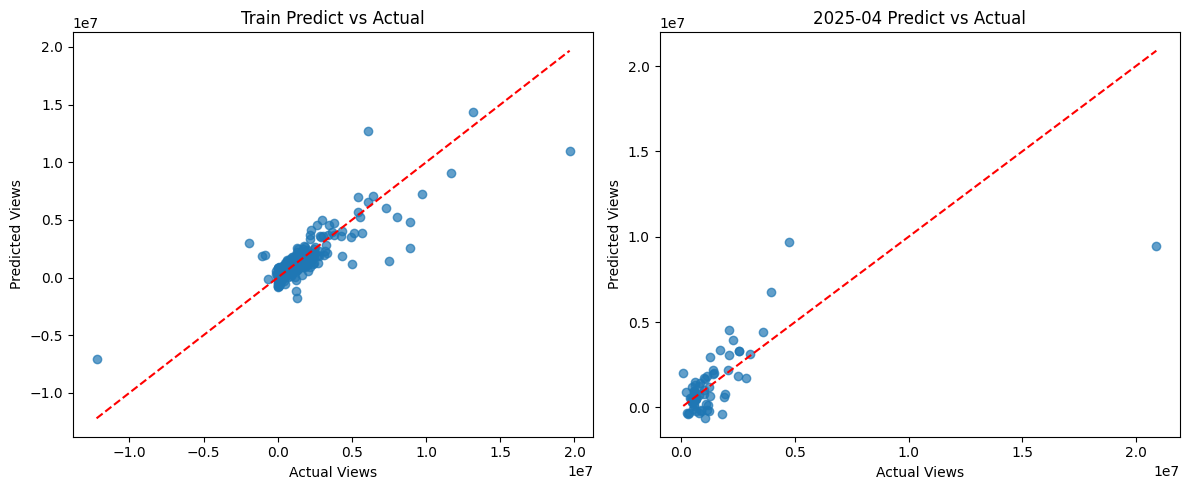

In [ ]:
# === 步驟 9：評估與繪圖 ==
# 畫圖
plt.figure(figsize=(12, 5))

# 左圖：訓練資料預測表現
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title("Train Predict vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

# 右圖：四月預測表現
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title("2025-04 Predict vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.tight_layout()
plt.show()

In [ ]:
# === 額外步驟：計算命中率與 NDCG ===
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

# 取前 10% 人選
top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

# 計算 Hit Rate（命中幾個同樣的創作者）
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# DCG 計算函數
def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    # 使用 log1p 做平滑，避免數值爆炸
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))

    return np.sum(gains / discounts)

# 計算 DCG 與 NDCG
dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")


📈 命中率 (HitRate) 前 10%: 0.667
📊 標準化折扣累積增益 (NDCG) 前 10%: 0.985


In [ ]:
# === 額外步驟：誤差最大前 10 名創作者 ===

# 訓練集誤差（全體資料）
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_all,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))




📉 訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
307,rondoyoyo,"19,673,918","10,964,745","8,709,173"
309,ktstory,"6,101,383","12,728,687","6,627,304"
238,rondoyoyo,"8,883,244","2,540,166","6,343,078"
94,smilevlogtaiwan,"7,492,922","1,397,633","6,095,289"
27,magic_studio_,"-12,214,754","-7,044,640","5,170,114"
144,deliciousthirsty,"-1,937,202","3,014,373","4,951,575"
102,ktstory,"8,915,789","4,839,460","4,076,329"
75,deliciousthirsty,"5,030,917","1,215,936","3,814,981"
282,deliciousthirsty,"1,310,801","-1,813,707","3,124,508"
84,daddy.iam.9999,"-1,063,079","1,839,662","2,902,741"



📉 2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"20,899,148","9,447,476","11,451,672"
32,terry-films,"4,719,511","9,661,481","4,941,970"
33,ktstory,"3,951,123","6,771,668","2,820,545"
25,smilevlogtaiwan,"2,092,497","4,516,069","2,423,572"
18,zuola,"1,781,912","-383,018","2,164,930"
62,taiwango2020,"82,693","1,990,091","1,907,398"
14,54free,"1,276,339","2,964,192","1,687,853"
24,nowyouon,"2,263,710","3,946,694","1,682,984"
42,hard2men1213,"1,026,729","-643,101","1,669,830"
12,realchina,"1,710,938","3,359,846","1,648,908"


# 12個月交叉驗證版本+調參

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
        '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
        '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,3000,1265214,2000,1231154,4000,1447236,2000,991758,2000,894392,...,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,700,328885,1100,502659,1400,649359,1200,633065,1700,503433,...,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,0,609998,2000,619214,1000,644864,1000,737051,1000,580588,...,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,678782,1000,516446,1000,597046,1000,418324,1000,360793,...,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,1676109,2000,887819,2000,1179563,1000,1109007,1000,865679,...,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2600,-83502,3100,438050,3300,616071,2000,382466,3000,692321,...,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,900,466128,1100,450602,800,332796,500,246380,900,253562,...,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,974311,0,495264,0,336247,0,721623,0,785773,...,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,...,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,0.157156,0.044886,-0.206289,-0.045368,0.241254,0.040374,-0.186145,-0.011904,-0.149731,-0.123931,...,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.474412,-0.613628,-0.466983,-0.404736,-0.349774,-0.332434,-0.380862,-0.109438,-0.184032,-0.178069,...,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.666629,-0.415923,-0.206289,-0.347239,-0.440702,-0.334534,-0.429541,-0.081162,-0.264068,-0.167385,...,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.392034,-0.367548,-0.495949,-0.397935,-0.440702,-0.356877,-0.429541,-0.167829,-0.264068,-0.197820,...,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.117439,0.333865,-0.206289,-0.214736,-0.213383,-0.084696,-0.429541,0.019978,-0.264068,-0.127907,...,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,0.047318,-0.903657,0.112338,-0.436608,0.082131,-0.347988,-0.186145,-0.177579,-0.035395,-0.151913,...,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.419493,-0.517106,-0.466983,-0.430416,-0.486165,-0.480348,-0.551239,-0.214583,-0.275501,-0.212669,...,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.666629,-0.159704,-0.785609,-0.408384,-0.668020,-0.478735,-0.672937,-0.085358,-0.378404,-0.138972,...,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：轉換成 LSTM 格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers",
                          f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],
            [features[j][2], features[j][3]]
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])

X = np.array(X)
y = np.array(y)
month_targets = np.array(month_targets)
creator_list = np.array(creator_list)

In [ ]:
# === 步驟 5：分離預測 4 月份資料 ===
april_mask = month_targets == '2025-04-30'
X_april, y_april = X[april_mask], y[april_mask]
creator_april = creator_list[april_mask]

X_all = X[~april_mask]
y_all = y[~april_mask]
creator_all = creator_list[~april_mask]

In [ ]:
# === 步驟 6：自動調參（Grid Search + KFold）===
param_grid = {
    'lstm_units': [32, 64],
    'learning_rate': [0.001, 0.005],
    'batch_size': [16, 32]
}

best_model = None
best_r2 = -np.inf
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lstm_units in param_grid['lstm_units']:
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            fold_r2_scores = []
            for train_idx, val_idx in kf.split(X_all):
                X_train, X_val = X_all[train_idx], X_all[val_idx]
                y_train, y_val = y_all[train_idx], y_all[val_idx]

                model = Sequential([
                    LSTM(lstm_units, input_shape=(2, 2)),
                    Dense(1)
                ])
                model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
                model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)

                y_val_pred = model.predict(X_val).flatten()
                r2 = r2_score(y_val, y_val_pred)
                fold_r2_scores.append(r2)

            avg_r2 = np.mean(fold_r2_scores)
            print(f"✅ LSTM={lstm_units}, LR={lr}, Batch={batch_size} → 平均 R2: {avg_r2:.4f}")

            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {'lstm_units': lstm_units, 'lr': lr, 'batch_size': batch_size}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ LSTM=32, LR=0.001, Batch=16 → 平均 R2: 0.5423


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ LSTM=32, LR=0.001, Batch=32 → 平均 R2: 0.5566


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ LSTM=32, LR=0.005, Batch=16 → 平均 R2: 0.1840


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ LSTM=32, LR=0.005, Batch=32 → 平均 R2: 0.3132


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
✅ LSTM=64, LR=0.001, Batch=16 → 平均 R2: 0.5194


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
✅ LSTM=64, LR=0.001, Batch=32 → 平均 R2: 0.5303


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ LSTM=64, LR=0.005, Batch=16 → 平均 R2: 0.1513


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
✅ LSTM=64, LR=0.005, Batch=32 → 平均 R2: 0.2303


In [ ]:
# === 步驟 7：用最佳參數重新訓練模型並保留驗證資料 ===
print(f"使用最佳參數訓練: {best_params}")
model_final = Sequential([
    LSTM(best_params['lstm_units'], input_shape=(2, 2)),
    Dense(1)
])
model_final.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')
model_final.fit(X_all, y_all, epochs=100, batch_size=best_params['batch_size'], verbose=0)

使用最佳參數訓練: {'lstm_units': 32, 'lr': 0.001, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# === 步驟 8：預測與反標準化 ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

y_april_pred = model_final.predict(X_april).flatten()
y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [ ]:
#  計算整體訓練資料上的預測表現
y_train_pred = model_final.predict(X_all).flatten()
y_train_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_views")[0]
    for y_, month in zip(y_all, month_targets[~april_mask])
])
y_train_pred_actual = np.array([
    inverse_transform_views(np.array([y_]), f"{month}_views")[0]
    for y_, month in zip(y_train_pred, month_targets[~april_mask])
])

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print(f"Test RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2_train:.2f}")
#  四月預測表現
rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

print(f"April RMSE: {rmse_april:.2f}")
print(f"April R²: {r2_april:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test RMSE: 2127539.05
Test R² Score: 0.52
April RMSE: 2319874.28
April R²: 0.16


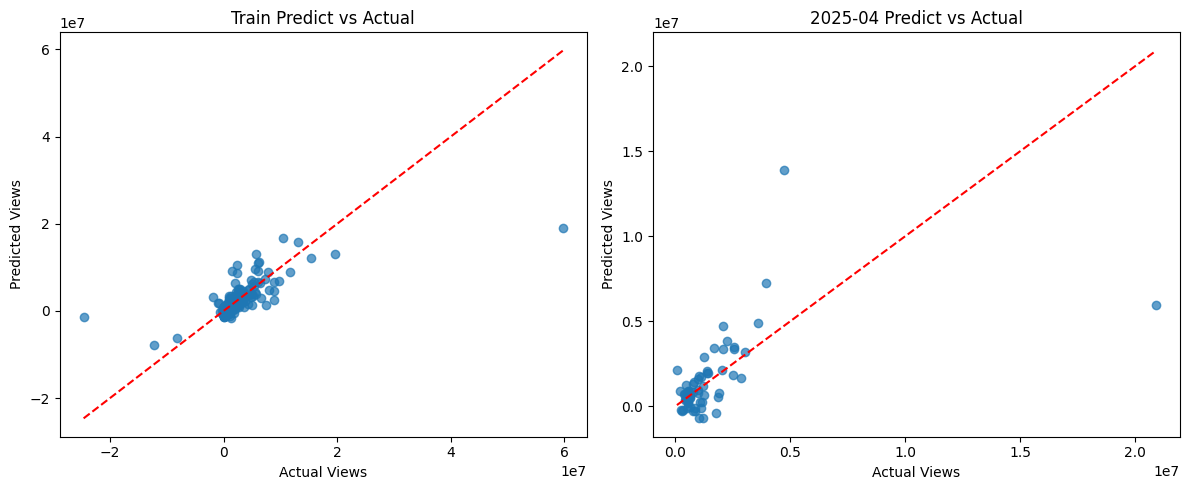

In [ ]:
# === 步驟 9：評估與繪圖 ==
# 畫圖
plt.figure(figsize=(12, 5))

# 左圖：訓練資料預測表現
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title("Train Predict vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

# 右圖：四月預測表現
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title("2025-04 Predict vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.tight_layout()
plt.show()

In [ ]:
# === 額外步驟：計算命中率與 NDCG ===
y_april_actual_series = pd.Series(y_april_actual, index=creator_april)
y_april_pred_actual_series = pd.Series(y_april_pred_actual, index=creator_april)

# 取前 10% 人選
top_k = int(len(y_april_actual_series) * 0.10)
actual_top_indices = y_april_actual_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_actual_series.sort_values(ascending=False).head(top_k).index

# 計算 Hit Rate（命中幾個同樣的創作者）
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# DCG 計算函數
def dcg_score(y_true, y_pred, k):
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    # 使用 log1p 做平滑，避免數值爆炸
    gains = np.log1p(y_true_sorted)
    discounts = np.log2(np.arange(2, k + 2))

    return np.sum(gains / discounts)

# 計算 DCG 與 NDCG
dcg = dcg_score(y_april_actual_series.values, y_april_pred_actual_series.values, top_k)
ideal_dcg = dcg_score(y_april_actual_series.values, y_april_actual_series.values, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 顯示結果
print(f"命中率 (HitRate) 前 10%: {hit_rate:.3f}")
print(f"標準化折扣累積增益 (NDCG) 前 10%: {ndcg:.3f}")

命中率 (HitRate) 前 10%: 0.667
標準化折扣累積增益 (NDCG) 前 10%: 0.981


In [ ]:
# === 額外步驟：誤差最大前 10 名創作者 ===

# 訓練集誤差（全體資料）
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_all,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化表格
print("訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))



訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
170,terry-films,"59,692,364","18,920,739","40,771,625"
96,magic_studio_,"-24,636,792","-1,440,614","23,196,178"
161,gloryandy,"2,306,515","10,445,951","8,139,436"
150,realchina,"1,434,454","9,232,843","7,798,389"
154,allieallie,"5,765,140","13,056,842","7,291,702"
514,rondoyoyo,"19,673,918","12,965,453","6,708,465"
100,rondoyoyo,"10,395,765","16,838,634","6,442,869"
445,rondoyoyo,"8,883,244","2,453,241","6,430,003"
162,nowyouon,"2,424,508","8,712,241","6,287,733"
301,smilevlogtaiwan,"7,492,922","1,455,286","6,037,636"


2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"20,899,148","5,969,870","14,929,278"
32,terry-films,"4,719,511","13,874,084","9,154,573"
33,ktstory,"3,951,123","7,259,436","3,308,313"
25,smilevlogtaiwan,"2,092,497","4,744,546","2,652,049"
18,zuola,"1,781,912","-357,967","2,139,879"
62,taiwango2020,"82,693","2,128,426","2,045,733"
11,6artstv,"1,236,725","-696,308","1,933,033"
12,realchina,"1,710,938","3,434,354","1,723,416"
42,hard2men1213,"1,026,729","-648,245","1,674,974"
14,54free,"1,276,339","2,889,311","1,612,972"


# 無交叉驗證版本也無調整參數

In [ ]:
# === 步驟 1：讀取與清洗資料 ===
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
# === 步驟 2：擷取指定月份欄位 ===
months = ['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# === 步驟 3：標準化數據 ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# === 步驟 4：將資料轉為適合 LSTM 的序列格式 ===
X, y = [], []
month_targets = []
creator_list = []

for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]

    features = df_scaled[[f"{m1}_views", f"{m1}_subscribers", f"{m2}_views", f"{m2}_subscribers"]].values
    targets = df_scaled[f"{m3}_views"].values

    for j in range(features.shape[0]):
        X.append([
            [features[j][0], features[j][1]],  # month 1
            [features[j][2], features[j][3]]   # month 2
        ])
        y.append(targets[j])
        month_targets.append(m3)
        creator_list.append(df_scaled.index[j])  # ✅ 加入創作者名稱

X = np.array(X)
display(X)
y = np.array(y)
display(y)


array([[[-0.01190378, -0.1861451 ],
        [-0.12393141, -0.14973115]],

       [[-0.10943782, -0.38086198],
        [-0.17806863, -0.18403211]],

       [[-0.08116246, -0.4295412 ],
        [-0.16738475, -0.26406769]],

       ...,

       [[-0.43284711, -0.9442807 ],
        [-0.49281792, -0.97987906]],

       [[-0.27876665,  0.05319891],
        [-0.47655698, -0.50161878]],

       [[-0.39055587, -0.14629701],
        [-0.54036   , -0.50161878]]])

array([-7.35948163e-02, -2.35019246e-01, -1.52186639e-01, -3.10280540e-02,
       -1.12653596e-01,  1.31068248e-01,  8.85039383e-03,  3.04087817e-02,
        1.23309600e-01,  2.94501298e-01,  4.27942556e-01, -4.19974866e-01,
        1.35363501e+00,  2.74264424e-01,  7.43818659e-02,  4.78320251e-01,
        1.31603649e+00, -3.18411747e-01, -4.26955839e-01,  1.39910045e-01,
       -3.93973967e-01, -4.11723429e-01,  5.39287352e-01,  1.19724632e-01,
        5.73642611e-01,  1.16305985e-01, -1.47717779e-01, -5.45632979e+00,
       -5.45855928e-02, -2.14762200e-01, -2.09931056e-01,  1.59296745e+00,
        4.97616834e+00,  1.91722346e+00,  4.99968798e-01,  1.64187212e-01,
       -2.39252209e-01, -4.12529923e-01, -6.55652781e-02, -1.79658083e-01,
        3.95189976e-02,  6.61016105e-02, -4.23190963e-01, -4.14909061e-01,
       -1.79130712e-01,  1.56305057e-01, -6.84717865e-02, -2.54968762e-01,
       -4.05171846e-01, -6.33302308e-02, -2.37839300e-01, -2.66369603e-01,
       -1.66581283e-02, -

In [ ]:
# === 步驟 5：分離預測 4 月份的資料 ===
april_mask = []
for i in range(len(months) - 2):
    if months[i+2] == '2025-04-30':
        april_mask.extend([True] * len(df_scaled))
    else:
        april_mask.extend([False] * len(df_scaled))

april_mask = np.array(april_mask) # Convert to numpy array

X_april, y_april = X[april_mask], y[april_mask]
display(X_april)
display(y_april)
X_train, y_train = X[~april_mask], y[~april_mask]
display(X_train)
display(y_train)

# ✅ 補上創作者對應陣列
creator_train = np.array(creator_list)[~april_mask]
creator_april = np.array(creator_list)[april_mask]

array([[[-0.01723377,  0.05319891],
        [ 0.15799666,  0.93316204]],

       [[-0.46478279, -0.39566691],
        [-0.623148  ,  0.74185793]],

       [[-0.08851188,  0.05319891],
        [-0.05206699, -0.02335851]],

       [[-0.34862997, -0.44554089],
        [-0.38431926, -0.50161878]],

       [[-0.14580471, -0.44554089],
        [ 0.08260065, -0.50161878]],

       [[-0.54235699, -0.9442807 ],
        [-0.78542393, -1.45813933]],

       [[ 0.11285651, -0.69491079],
        [ 0.16873423, -0.69292289]],

       [[ 0.04054361,  0.55193872],
        [ 0.08107972, -0.02335851]],

       [[ 0.5033027 ,  0.55193872],
        [-0.13934009, -0.02335851]],

       [[ 0.01941553, -0.44554089],
        [ 0.23518201, -0.50161878]],

       [[ 0.59392559,  0.05319891],
        [ 0.78155297, -0.02335851]],

       [[-0.57386995, -0.54528885],
        [-0.62242991,  1.98533465]],

       [[ 0.23161129, -0.44554089],
        [ 0.98667713, -0.02335851]],

       [[-0.35052613, -0.74478477],
  

array([-1.87484522e-01, -2.39236193e-01, -2.63978250e-01, -3.16659067e-01,
       -2.53474796e-01, -3.58913069e-01, -1.25428105e-01, -1.59046030e-01,
        5.46258037e-01,  4.09786223e-01,  4.31523963e-01, -8.98136226e-02,
        9.75218015e-02,  1.65920269e-01, -7.41643142e-02, -3.41442912e-02,
        2.41502629e-01, -1.46921312e-01,  1.25559718e-01, -7.51708027e-03,
       -2.75807869e-01, -1.25020024e-01,  6.22854081e-01,  4.26845842e-01,
        3.15891557e-01,  2.48254736e-01,  2.32533530e-01, -2.63196851e-01,
       -3.62790434e-01, -3.44054640e-01, -3.45450729e-01,  7.67772618e+00,
        1.28604320e+00,  9.82495447e-01,  8.44502315e-01, -3.23018018e-02,
        1.78915271e-01, -7.44653384e-02, -1.77862019e-01, -3.28028064e-01,
       -9.76252403e-02, -1.90240355e-01, -1.72771470e-01, -1.12254938e-01,
       -4.27691570e-01, -3.44121798e-01, -3.58535801e-01, -3.60991400e-01,
       -4.59386812e-01, -3.83584412e-01, -3.71594405e-01, -3.32179195e-01,
       -3.61295979e-01, -

array([[[-0.01190378, -0.1861451 ],
        [-0.12393141, -0.14973115]],

       [[-0.10943782, -0.38086198],
        [-0.17806863, -0.18403211]],

       [[-0.08116246, -0.4295412 ],
        [-0.16738475, -0.26406769]],

       ...,

       [[-0.74623363, -0.74466755],
        [-0.43284711, -0.9442807 ]],

       [[-0.31012785, -0.39562835],
        [-0.27876665,  0.05319891]],

       [[-0.38921582, -0.43053227],
        [-0.39055587, -0.14629701]]])

array([-7.35948163e-02, -2.35019246e-01, -1.52186639e-01, -3.10280540e-02,
       -1.12653596e-01,  1.31068248e-01,  8.85039383e-03,  3.04087817e-02,
        1.23309600e-01,  2.94501298e-01,  4.27942556e-01, -4.19974866e-01,
        1.35363501e+00,  2.74264424e-01,  7.43818659e-02,  4.78320251e-01,
        1.31603649e+00, -3.18411747e-01, -4.26955839e-01,  1.39910045e-01,
       -3.93973967e-01, -4.11723429e-01,  5.39287352e-01,  1.19724632e-01,
        5.73642611e-01,  1.16305985e-01, -1.47717779e-01, -5.45632979e+00,
       -5.45855928e-02, -2.14762200e-01, -2.09931056e-01,  1.59296745e+00,
        4.97616834e+00,  1.91722346e+00,  4.99968798e-01,  1.64187212e-01,
       -2.39252209e-01, -4.12529923e-01, -6.55652781e-02, -1.79658083e-01,
        3.95189976e-02,  6.61016105e-02, -4.23190963e-01, -4.14909061e-01,
       -1.79130712e-01,  1.56305057e-01, -6.84717865e-02, -2.54968762e-01,
       -4.05171846e-01, -6.33302308e-02, -2.37839300e-01, -2.66369603e-01,
       -1.66581283e-02, -

In [ ]:
# === 步驟 6：建立並訓練 LSTM 模型 ===
model = Sequential([
    LSTM(32, input_shape=(2, 2)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5894 - mae: 0.6056 - val_loss: 0.6487 - val_mae: 0.4948
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3699 - mae: 0.5486 - val_loss: 0.5157 - val_mae: 0.4435
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1728 - mae: 0.4958 - val_loss: 0.3929 - val_mae: 0.3927
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9905 - mae: 0.4457 - val_loss: 0.2940 - val_mae: 0.3474
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8470 - mae: 0.4084 - val_loss: 0.2301 - val_mae: 0.3121
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7547 - mae: 0.3876 - val_loss: 0.1959 - val_mae: 0.2892
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7019 - mae: 0.3781 - val_loss: 0.1790 - val_mae: 0.2769
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6708 - mae: 0.3713 - val_loss: 0.1702 - val_mae: 0.2712
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6503 - mae: 0.

In [ ]:
# === 步驟 7：預測訓練與四月資料 ===
y_train_pred = model.predict(X_train).flatten()
display(y_train_pred)
y_april_pred = model.predict(X_april).flatten()
display(y_april_pred)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([-8.65159333e-02, -1.56783670e-01, -1.42852932e-01, -1.95345700e-01,
       -7.96293467e-02, -1.20310627e-01, -1.03431873e-01, -6.43490478e-02,
       -9.82264355e-02,  3.67455557e-02,  2.99675047e-01, -2.67477781e-01,
        3.62344116e-01,  6.29166216e-02, -1.11684278e-02,  1.15305923e-01,
        8.95928860e-01, -2.08871156e-01, -2.71679223e-01,  3.04223076e-02,
       -2.58463293e-01, -2.63762683e-01,  4.82882075e-02,  4.28722888e-01,
        3.19958866e-01, -4.90804985e-02, -1.77080423e-01, -2.28433180e+00,
       -1.10867910e-01, -1.63752437e-01, -1.73853517e-01,  1.00255466e+00,
        5.06878948e+00,  8.77612710e-01,  1.99076891e-01,  1.33544877e-02,
       -1.74365610e-01, -2.47331202e-01,  7.65432045e-03, -2.09143400e-01,
       -6.58523664e-02, -3.05387974e-02, -2.71665126e-01, -2.47276843e-01,
       -1.52490526e-01,  4.23834294e-01, -1.10191084e-01, -1.42369658e-01,
       -2.63145864e-01, -1.46908939e-01, -1.63554102e-01, -1.68176919e-01,
       -1.17327966e-01, -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([ 0.13954787, -0.4927959 , -0.07662208, -0.3693745 , -0.05554608,
       -0.61319226,  0.0891406 ,  0.04765776,  0.12379257,  0.09508573,
        0.6796007 , -0.491689  ,  0.6613942 , -0.30837446,  0.49604908,
        0.17305538,  0.55497265, -0.5050991 , -0.61937064,  0.20299128,
       -0.6631312 , -0.60476214,  0.549817  ,  0.70586395,  0.92523926,
        1.0601636 ,  0.22611517, -0.26650643, -0.39578214, -0.3623646 ,
       -0.32338747,  3.4006903 ,  3.1039212 ,  1.9905401 ,  1.1207441 ,
        0.20275703, -0.23892656, -0.3182183 , -0.20808938, -0.6270033 ,
       -0.11299103, -0.30096927, -0.682077  , -0.53740156, -0.38682672,
       -0.19921821, -0.20383793, -0.20597228, -0.688823  , -0.3668594 ,
       -0.5286751 , -0.3735282 , -0.16612118, -0.63146514, -0.31913868,
       -0.31011865, -0.48426113, -0.6574651 , -0.19876459, -0.09783426,
       -0.32961658, -0.17222196,  0.19292846, -0.4030665 , -0.02981042,
       -0.6801036 , -0.45735356, -0.38164052, -0.4561138 ], dtyp

In [ ]:
# === 步驟 8：反標準化（恢復原始觀看數單位） ===
def inverse_transform_views(series, column_name):
    idx = df.columns.get_loc(column_name)
    return scaler.mean_[idx] + scaler.scale_[idx] * series

target_col_train = '2025-03-31_views'
y_train_actual = inverse_transform_views(y_train, target_col_train)
y_train_pred_actual = inverse_transform_views(y_train_pred, target_col_train)

y_april_actual = inverse_transform_views(y_april, '2025-04-30_views')
y_april_pred_actual = inverse_transform_views(y_april_pred, '2025-04-30_views')

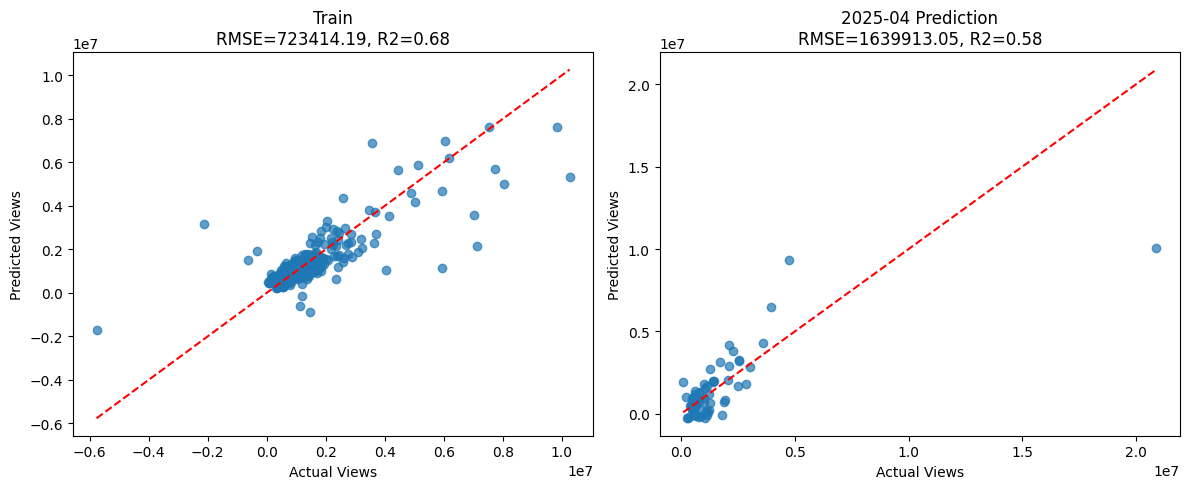

In [ ]:
# === 步驟 9：評估與繪圖 ===
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

rmse_april = np.sqrt(mean_squared_error(y_april_actual, y_april_pred_actual))
r2_april = r2_score(y_april_actual, y_april_pred_actual)

plt.figure(figsize=(12, 5))

# 訓練集
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_train_pred_actual, alpha=0.7)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--')
plt.title(f"Train\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

# 四月預測
plt.subplot(1, 2, 2)
plt.scatter(y_april_actual, y_april_pred_actual, alpha=0.7)
plt.plot([min(y_april_actual), max(y_april_actual)], [min(y_april_actual), max(y_april_actual)], 'r--')
plt.title(f"2025-04 Prediction\nRMSE={rmse_april:.2f}, R2={r2_april:.2f}")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")

plt.tight_layout()
plt.show()


In [ ]:
# 訓練誤差表
train_errors = np.abs(y_train_actual - y_train_pred_actual)
train_error_df = pd.DataFrame({
    'creator_handle': creator_train,
    'actual_views': y_train_actual,
    'predicted_views': y_train_pred_actual,
    'error': train_errors
}).sort_values(by='error', ascending=False).head(10)

# 四月預測誤差表
april_errors = np.abs(y_april_actual - y_april_pred_actual)
april_error_df = pd.DataFrame({
    'creator_handle': creator_april,
    'actual_views': y_april_actual,
    'predicted_views': y_april_pred_actual,
    'error': april_errors
}).sort_values(by='error', ascending=False).head(10)

# 顯示格式化結果
print("\n訓練集預測誤差最大前 10 名創作者")
display(train_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))

print("\n2025-04 預測誤差最大前 10 名創作者")
display(april_error_df.style.format({
    'actual_views': '{:,.0f}',
    'predicted_views': '{:,.0f}',
    'error': '{:,.0f}'
}))


訓練集預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
144,deliciousthirsty,"-2,140,212","3,190,425","5,330,637"
238,rondoyoyo,"7,127,337","2,157,568","4,969,769"
307,rondoyoyo,"10,272,236","5,331,918","4,940,318"
94,smilevlogtaiwan,"5,944,401","1,126,410","4,817,991"
27,magic_studio_,"-5,767,634","-1,725,815","4,041,819"
102,ktstory,"7,036,290","3,566,206","3,470,084"
309,ktstory,"3,560,669","6,910,994","3,350,325"
446,terry-films,"8,049,501","5,031,338","3,018,163"
75,deliciousthirsty,"4,055,091","1,075,043","2,980,047"
165,magic_studio_,"1,477,701","-881,369","2,359,070"



2025-04 預測誤差最大前 10 名創作者


,creator_handle,actual_views,predicted_views,error
31,rondoyoyo,"20,899,148","10,072,440","10,826,708"
32,terry-films,"4,719,511","9,321,211","4,601,700"
33,ktstory,"3,951,123","6,502,845","2,551,722"
25,smilevlogtaiwan,"2,092,497","4,147,729","2,055,232"
18,zuola,"1,781,912","-103,773","1,885,685"
62,taiwango2020,"82,693","1,952,446","1,869,753"
24,nowyouon,"2,263,710","3,806,187","1,542,477"
14,54free,"1,276,339","2,719,753","1,443,414"
12,realchina,"1,710,938","3,138,301","1,427,363"
42,hard2men1213,"1,026,729","-262,506","1,289,235"
